## Observations and Insights 

Based on the given data, the duplicate mouse ID is g989.  The total number of mice is 248.  The percentage of male mice is more than female mice. 

For the number of measurements on each drug regimen, Capomulin and Ramicane are the top two used.  By select one of mouse ID :b128 using Capomulin regimen, the average weight (g) :22, tumor volume (mm3): 41.96, and timepoint : 22.5.  As founded, higher tumor volume turns out lower timepoint. 
  
For the Capomulin regimen, r = 0.70885 indicates a strong positive relationship between average tumor volume and mouse weight.  For every mouse weight increase, the average tumor volume will go up by 0.95(mm3). 





In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress,pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
combined_data_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [3]:
# Checking the number of mice.
num_mice = combined_data_df["Mouse ID"].value_counts()
print(len(num_mice))

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseid_timepoint =combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID']

print(len(duplicate_mouseid_timepoint))

5


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_id =pd.DataFrame(duplicate_mouseid_timepoint)
duplicate_mouse_id

,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data_df =combined_data_df[combined_data_df ['Mouse ID'].isin(duplicate_mouseid_timepoint)== False]


print(len(clean_data_df))


1880


In [7]:
# Checking the number of mice in the clean DataFrame.

num_of_mice = clean_data_df['Mouse ID'].value_counts()

print(len(num_of_mice))

248


In [8]:
clean_data_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = round(clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),2)
median = round(clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),2)
var = round(clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),2)
std = round(clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),2)
sem = round(clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(),4)


summary = pd.DataFrame({"mean": mean, "median":median, "variance": var,"STD": std, "SEM": sem})
summary

,mean,median,variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.3293
Ceftamin,52.59,51.78,39.29,6.27,0.4698
Infubinol,52.88,51.82,43.13,6.57,0.4922
Ketapril,55.24,53.70,68.55,8.28,0.6039
Naftisol,54.33,52.51,66.17,8.13,0.5965
Placebo,54.03,52.29,61.17,7.82,0.5813
Propriva,52.32,50.45,43.85,6.62,0.5443
Ramicane,40.22,40.67,23.49,4.85,0.3210
Stelasyn,54.23,52.43,59.45,7.71,0.5731


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


agg_summary =clean_data_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


agg_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Measurements by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

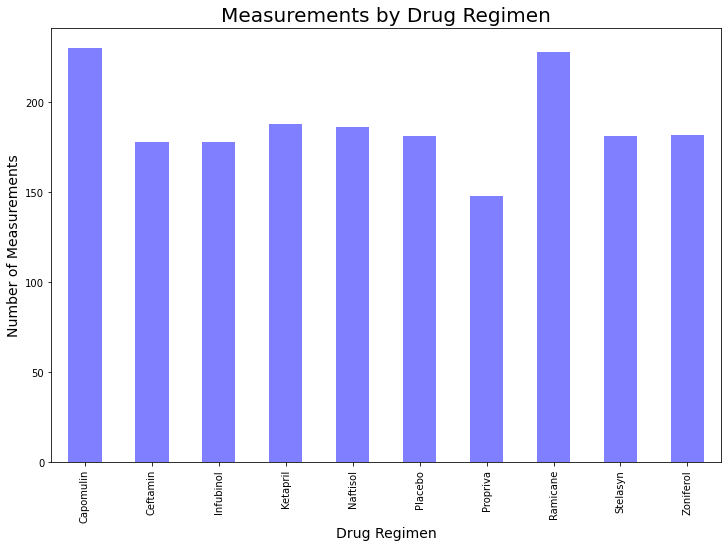

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

groupby = clean_data_df.groupby('Drug Regimen')['Mouse ID'].count()
fig1, ax1 = plt.subplots(figsize=(12, 8))
bar_pandas = groupby.plot.bar(color = 'b', alpha = 0.5, align = "center")

plt.xlabel("Drug Regimen",fontsize=14)
plt.ylabel("Number of Measurements",fontsize=14)
plt.title ("Measurements by Drug Regimen",fontsize=20)

bar_pandas


Text(0.5, 1.0, 'Measurements by Drug Regimen')

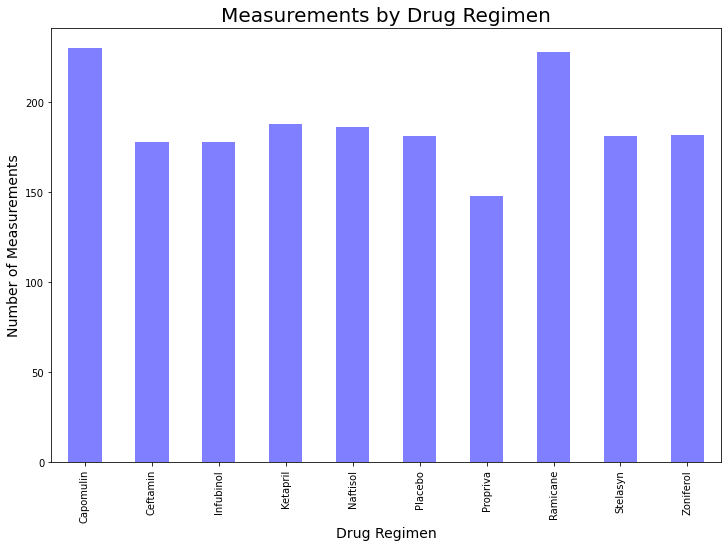

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
fig1, ax1 = plt.subplots(figsize=(12, 8))
groupby.plot(kind = 'bar', color = 'b',alpha = 0.5, align = "center")
plt.xlabel("Drug Regimen",fontsize=14)
plt.ylabel("Number of Measurements",fontsize=14)
plt.title ("Measurements by Drug Regimen", fontsize=20)


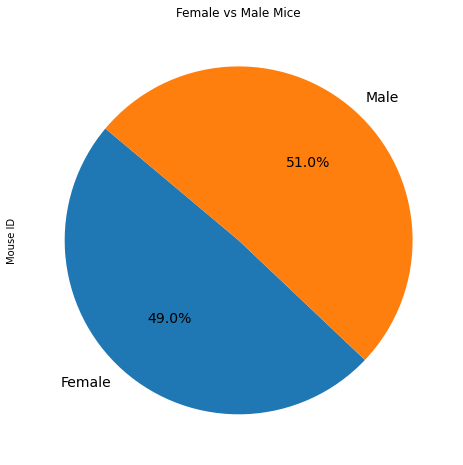

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_data_df.groupby('Sex')['Mouse ID'].count()
fig1, ax1 = plt.subplots(figsize=(12, 8))
gender_pie = gender_group.plot(kind="pie",autopct="%1.1f%%",startangle=140, title = "Female vs Male Mice", fontsize=14)



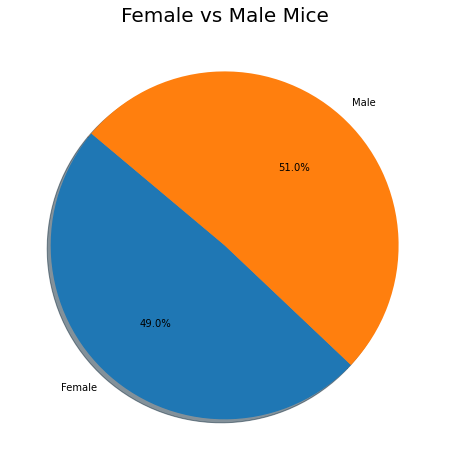

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title('Female vs Male Mice',fontsize=20)
labels = ["Female", "Male"]
plt.pie(gender_group, labels=labels,autopct="%1.1f%%", shadow=True, startangle=140 )

plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_volume = clean_data_df.loc[clean_data_df['Drug Regimen'].isin(['Capomulin',
                                                                           'Ramicane','Infubinol','Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint =final_tumor_volume.groupby('Mouse ID')['Timepoint'].max()



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df =pd.merge(last_timepoint,final_tumor_volume,on=['Timepoint','Mouse ID'], how='inner')

merge_df.head()



,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles =merge_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


 # Locate the rows which contain mice on each drug and get the tumor volumes
    
capomulin = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'] 
ramicane = merge_df.loc[merge_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'] 
infubinol = merge_df.loc[merge_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'] 
ceftamin = merge_df.loc[merge_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'] 
    
    # add subset 
 
tumor_vol_data = [capomulin,ramicane,infubinol,ceftamin]
    
    # Determine outliers using upper and lower bounds
    
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
   
    
    

Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


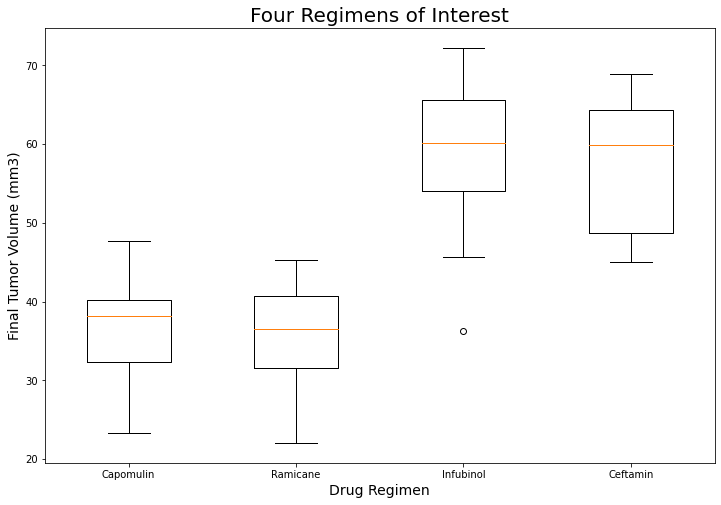

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Four Regimens of Interest',fontsize=20 )
ax1.set_xlabel('Drug Regimen',fontsize=14)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize=14)
ax1.boxplot(tumor_vol_data, labels = treatments_list, widths = 0.5 )
plt.show()




In [18]:
capomulin_df = final_tumor_volume.loc[final_tumor_volume['Drug Regimen']=='Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [61]:
capomulin_select = final_tumor_volume.loc[final_tumor_volume['Mouse ID']=='b128']

capomulin_select

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [62]:
capomulin_select.mean()

Age_months             9.000000
Weight (g)            22.000000
Timepoint             22.500000
Tumor Volume (mm3)    41.963636
Metastatic Sites       0.700000
dtype: float64

## Line and Scatter Plots

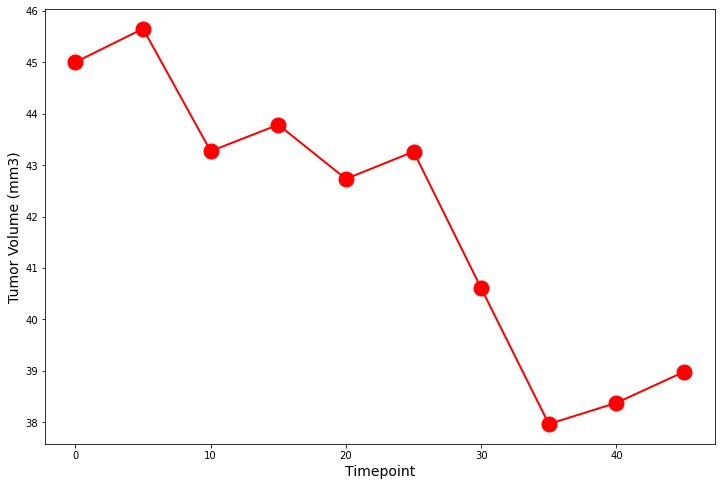

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis_data = capomulin_select["Timepoint"]
y_axis_data = capomulin_select["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.plot(x_axis_data,y_axis_data, linewidth = 2, markersize = 15, marker='o', color='red')

plt.xlabel('Timepoint', fontsize=14)         
plt.ylabel('Tumor Volume (mm3)', fontsize=14) 
plt.show()



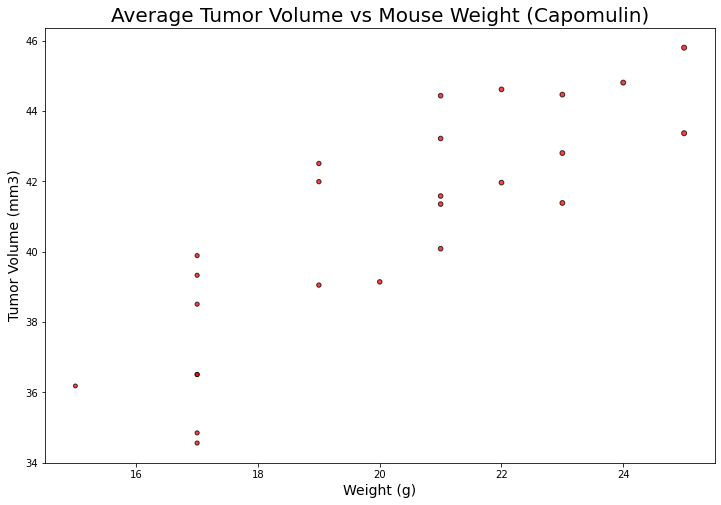

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


fig1, ax1 = plt.subplots(figsize=(12, 8))
avg_tumor_volume = capomulin_df.groupby(['Mouse ID']).mean()

x_axis_data = avg_tumor_volume["Weight (g)"]
y_axis_data = avg_tumor_volume["Tumor Volume (mm3)"]

plt.scatter(x_axis_data,y_axis_data, marker="o",facecolors="red", edgecolors="black",
            s=x_axis_data,alpha=0.75)
plt.title('Average Tumor Volume vs Mouse Weight (Capomulin)',fontsize=20)
plt.xlabel('Weight (g)', fontsize=14)         
plt.ylabel('Tumor Volume (mm3)', fontsize=14) 
marker_size = 20
plt.show()


## Correlation and Regression

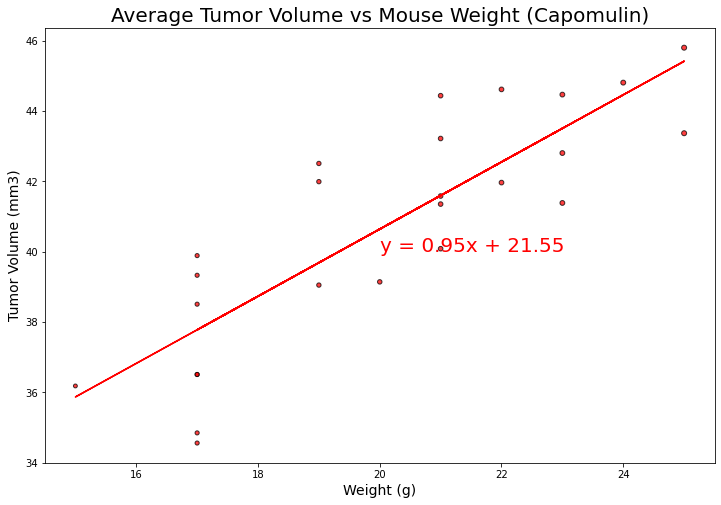

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(12, 8))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)

regress_values = x_axis_data * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis_data,y_axis_data, marker="o", facecolors="red", edgecolors="black",s=x_axis_data, alpha=0.75)

plt.plot(x_axis_data,regress_values, '-r')

plt.annotate(line_eq, xy=(20,40),xytext=(20,40),fontsize=20, color="red")

plt.title('Average Tumor Volume vs Mouse Weight (Capomulin)',fontsize=20)
plt.xlabel('Weight (g)' , fontsize = 14)         
plt.ylabel('Tumor Volume (mm3)',fontsize = 14) 


plt.show()


In [23]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.7088568047708717


In [24]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(x_axis_data, y_axis_data)[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume is:{corr}")

The correlation coefficient between mouse weight and average tumor volume is:0.84
